<a href="https://colab.research.google.com/github/niveditac-98/kdd-group-5/blob/main/Group5_Project_Initial_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title:** Analysis of the impact of COVID-19 on the Stock Market across different sectors and post-pandemic prediction of the same.

**Group Members:**

Ishani Naik (801223537)

Nivedita Chinnakannu (801200447)

Meghana Palaparthi (801203546)

Sayali Ambulkar (801200407)

**Research Questions**

1. Which sectors have taken the biggest hit from the virus crisis?
2. Which sectors or companies have seen a quicker recovery when compared to others?
3. How did vaccination affect COVID-19 cases, and in turn the Stock Market?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**What we did**
1. From https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset, the covid_19_data.csv file was downloaded.

2. From https://www.kaggle.com/paultimothymooney/stock-market-data, from sp500 --> csv, five datasets that were included in the S&P 500 Health Care Index (reference: https://www.barchart.com/stocks/indices/sp-sector/health-care) were downloaded.

3. Using DataRobot Paxata, the following steps were performed:

* Imported all the downloaded datasets.

* In covid_19_data.csv, removed unnecessary rows - the rows with any country other than the US were removed.

* Removed 4 unnecessary columns.

* Aggregated the values in the rows by merging rows with the same date.

4. This data was now ready to be merged with the Stock Market datasets.

5. This version of the covid_19_data dataset was merged with 5 of the Stock Market S&P 500 Health Care Index datasets (A.csv, ABBV.csv, ABC.csv, ABMD.csv, ABT.csv), merging on the date column.

6. The blank rows were removed.

7. The unnecessary columns were removed.

8. Now, we have a dataset containing the data for confirmed cases, deaths, recovered cases due to COVID-19, mapped with dates, for which we have the stock value information for the 5 companies from the S&P 500 Health Care Sector.

9. This dataset was exported from DataRobot and imported in this colaboratory notebook.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import gridspec
import os
%matplotlib inline

In [ ]:
import pandas as pd
# stock_df = pd.read_csv('/content/COVID_Stock_Market.csv')
stock_df = pd.read_csv('/content/COVID_Stock_Market_Healthcare_Index_Five.csv')
stock_df = pd.read_csv('COVID_Stock_Market_Healthcare_Index_Five.csv')

In [ ]:
stock_df.dtypes

ObservationDate                     object
Country/Region                      object
Confirmed                            int64
Deaths                               int64
Recovered                            int64
CountDistinct - ObservationDate      int64
Date                                object
Low                                float64
Open                               float64
Volume                             float64
High                               float64
Close                              float64
Adjusted Close                     float64
Date (1)                            object
Low (1)                            float64
Open (1)                           float64
Volume (1)                         float64
High (1)                           float64
Close (1)                          float64
Adjusted Close (1)                 float64
Date (2)                            object
Low (2)                            float64
Open (2)                           float64
Volume (2) 

In [ ]:
#Null Values by %
stock_df.isnull().sum()/ len(stock_df) * 100

ObservationDate                    0.000000
Country/Region                     0.000000
Confirmed                          0.000000
Deaths                             0.000000
Recovered                          0.000000
CountDistinct - ObservationDate    0.000000
Date                               4.057151
Low                                4.057151
Open                               4.057151
Volume                             4.057151
High                               4.057151
Close                              4.057151
Adjusted Close                     4.057151
Date (1)                           4.057151
Low (1)                            4.057151
Open (1)                           4.057151
Volume (1)                         4.057151
High (1)                           4.057151
Close (1)                          4.057151
Adjusted Close (1)                 4.057151
Date (2)                           4.057151
Low (2)                            4.057151
Open (2)                        

In [ ]:
#converting object datatype to datetime
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date (1)'] = pd.to_datetime(stock_df['Date (1)'])
stock_df['Date (2)'] = pd.to_datetime(stock_df['Date (2)'])
stock_df['Date (3)'] = pd.to_datetime(stock_df['Date (3)'])
stock_df['Date (4)'] = pd.to_datetime(stock_df['Date (4)'])

stock_df = stock_df.loc[stock_df.Date > '28-01-2020'].copy()

print(stock_df['Date'])
print(stock_df['Date (1)'])

0        2020-01-29
1        2020-01-30
2        2020-03-02
3        2020-03-02
4        2020-03-02
            ...    
149213   2020-08-10
149214   2020-08-10
149215   2020-08-10
149216   2020-08-10
149217   2020-08-10
Name: Date, Length: 139271, dtype: datetime64[ns]
0        2020-01-29
1        2020-01-30
2        2020-03-02
3        2020-03-02
4        2020-03-02
            ...    
149213   2020-10-08
149214   2020-10-08
149215   2020-10-08
149216   2020-10-08
149217   2020-10-08
Name: Date (1), Length: 139271, dtype: datetime64[ns]


In [ ]:
stock_df['Date (1)'] =  pd.to_datetime(stock_df['Date (1)']).dt.strftime('%Y-%m-%d')

stock_df['Date (2)'] =  pd.to_datetime(stock_df['Date (2)']).dt.strftime('%Y-%m-%d')

stock_df['Date (3)'] =  pd.to_datetime(stock_df['Date (3)']).dt.strftime('%Y-%m-%d')

stock_df['Date (4)'] =  pd.to_datetime(stock_df['Date (4)']).dt.strftime('%Y-%m-%d')
stock_df.dtypes

ObservationDate                            object
Country/Region                             object
Confirmed                                   int64
Deaths                                      int64
Recovered                                   int64
CountDistinct - ObservationDate             int64
Date                               datetime64[ns]
Low                                       float64
Open                                      float64
Volume                                    float64
High                                      float64
Close                                     float64
Adjusted Close                            float64
Date (1)                                   object
Low (1)                                   float64
Open (1)                                  float64
Volume (1)                                float64
High (1)                                  float64
Close (1)                                 float64
Adjusted Close (1)                        float64


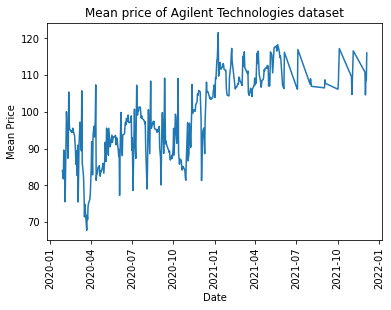

In [ ]:
#Graph showing Mean price of Agilent Technologies with respect to date

mean_df = stock_df.groupby(['Date']).mean()
plt.title('Mean price of Agilent Technologies dataset')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation = 'vertical')
plt.plot(mean_df.index,mean_df['High'])


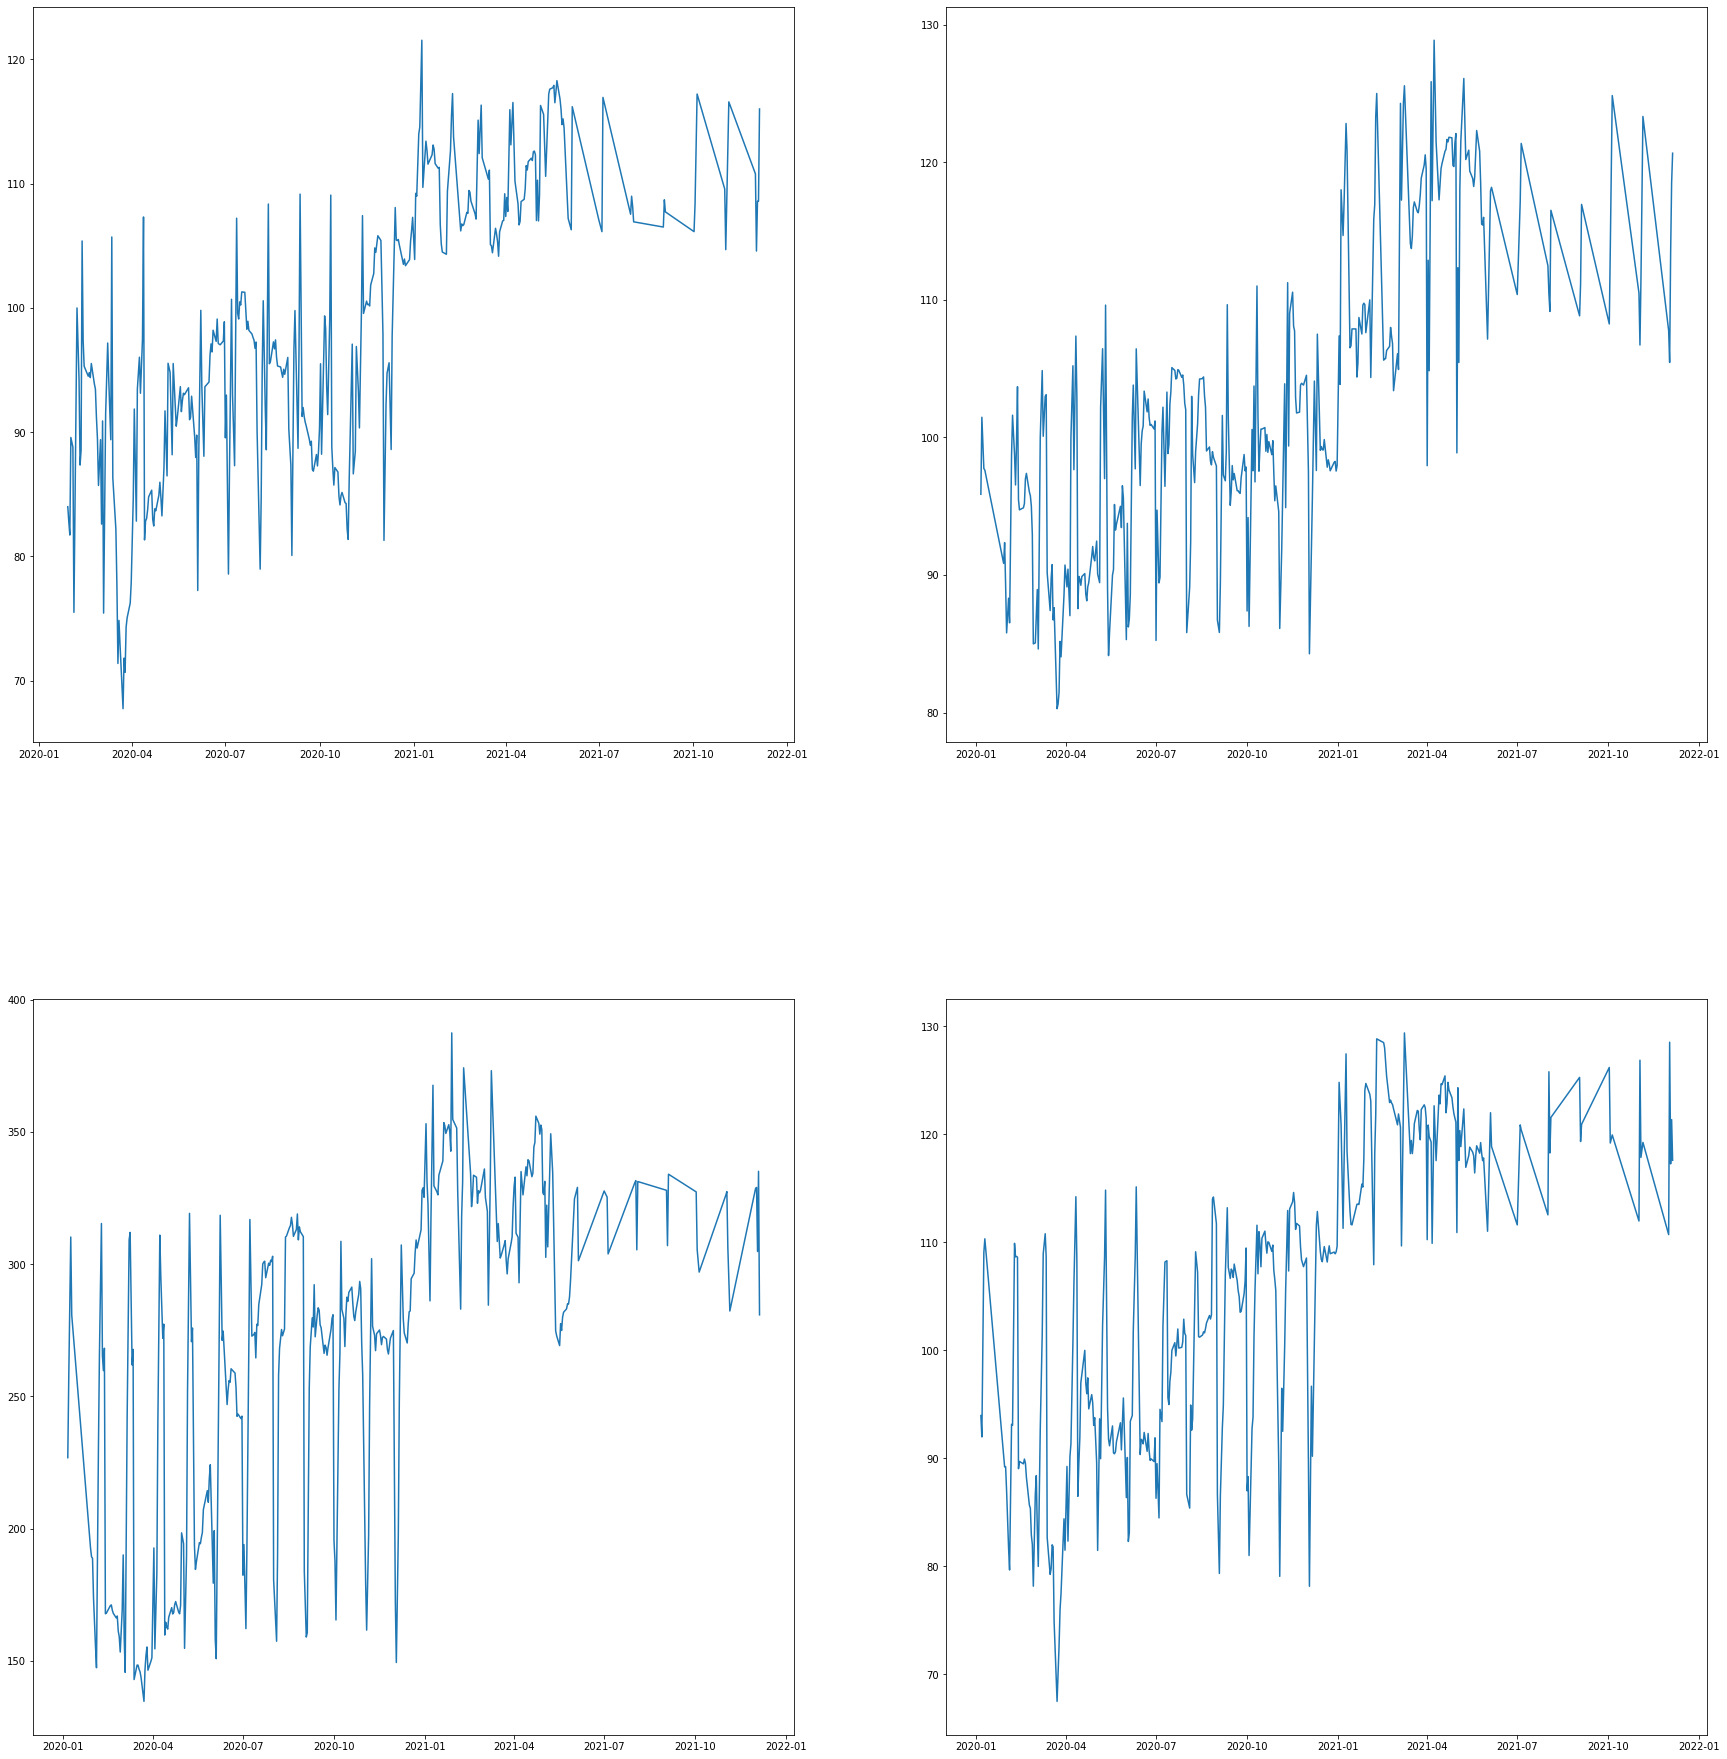

In [ ]:
figure, axis = plt.subplots(2, 2,figsize=(30,30))

mean_df = stock_df.groupby(['Date']).mean()
mean_df1 = stock_df.groupby(['Date (1)']).mean()
mean_df2 = stock_df.groupby(['Date (2)']).mean()
mean_df3 = stock_df.groupby(['Date (3)']).mean()
mean_df4 = stock_df.groupby(['Date (4)']).mean()
axis[0,0].plot(mean_df.index,mean_df['High'])
axis[0,1].plot(mean_df1.index,mean_df1['High (1)'])
axis[1,0].plot(mean_df2.index,mean_df2['High (2)'])
axis[1,1].plot(mean_df3.index,mean_df3['High (3)'])
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)


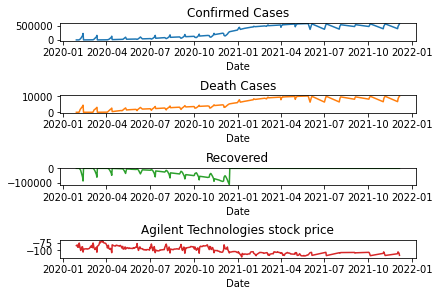

In [ ]:
#Comparison of the trends of confirmed COVID-19 cases and the stock price of the company under observation
fig, axs = plt.subplots(nrows= 4,constrained_layout=True)

axs[0].plot(mean_df.index, mean_df['Confirmed'])
axs[0].set_title('Confirmed Cases')

axs[1].plot(mean_df.index, mean_df['Deaths'], 'tab:orange')
axs[1].set_title('Death Cases')
axs[2].plot(mean_df.index, -mean_df['Recovered'], 'tab:green')
axs[2].set_title('Recovered')
axs[3].plot(mean_df.index, -mean_df['High'], 'tab:red')
axs[3].set_title('Agilent Technologies stock price')

for ax in axs.flat:
    ax.set(xlabel='Date')



             Deaths      High  Recovered
Deaths     1.000000  0.341227  -0.042406
High       0.341227  1.000000  -0.019961
Recovered -0.042406 -0.019961   1.000000


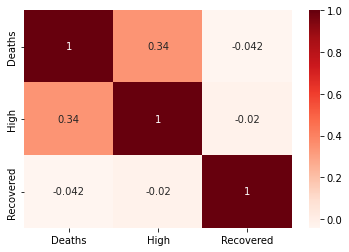

In [ ]:
stock_df[['Deaths','High','Recovered']].corr()
print(stock_df[['Deaths','High','Recovered']].corr())
#plot the correlation matrix of 'Deaths','Recovered','High' in stock_df dataframe.
sb.heatmap(stock_df[['Deaths','High','Recovered']].corr(), annot=True, cmap = 'Reds')
plt.show()

*   We have used the data from one company from the S&P 500 Health Care Sector. We are planning to include data from the companies that make up various sector indices in the future.

*  In the analysis, we will then add graphs to show sector-wise comparison of the impact of COVID-19.